In [1]:
import gdal
import numpy.ma as ma
import palettable as p
import matplotlib as mpl

In [2]:
f = '/Users/barnhatb/Dropbox/virtual_share_win7/lai/bcczo_land_cover.tif'
d = gdal.Open(f)

In [3]:
dat = d.GetRasterBand(1).ReadAsArray()

In [10]:
dat[dat==11] = 0
dat[dat==12] = 0
dat[dat==21] = 0
dat[dat==22] = 0
dat[dat==23] = 0
dat[dat==24] = 0
dat[dat==31] = 0

In [11]:
dat = ma.masked_equal(dat,0)

In [12]:
vals = np.unique(dat)

In [13]:
vals

masked_array(data = [41 42 43 52 71 81 82 90 95 --],
             mask = [False False False False False False False False False  True],
       fill_value = 0)

In [14]:
legend = {11:'Open Water',12:'Perennial Ice/Snow',21:'Developed, Open Space',22:'Developed, Low Intensity',
          23:'Developed, Medium Intensity',24:'Developed, High Intensity',31:'Barren Land',41:'Deciduous Forest',
          42:'Evergreen Forest',43:'Mixed Forest',52:'Shrub/Scrub',71:'Grassland/Herbaceous',81:'Pasture/Hay',
          82:'Cultivated Crops',90:'Woody Wetlands',95:'Emergent Herbaceous Wetlands'}

In [15]:
num = []
names = []
types = []
n = len(dat[dat!=0])
for val in vals.data[0:-1]:
    num.append(len(dat[dat==val])/float(n)*100)
    names.append(legend[val])
    types.append(val)

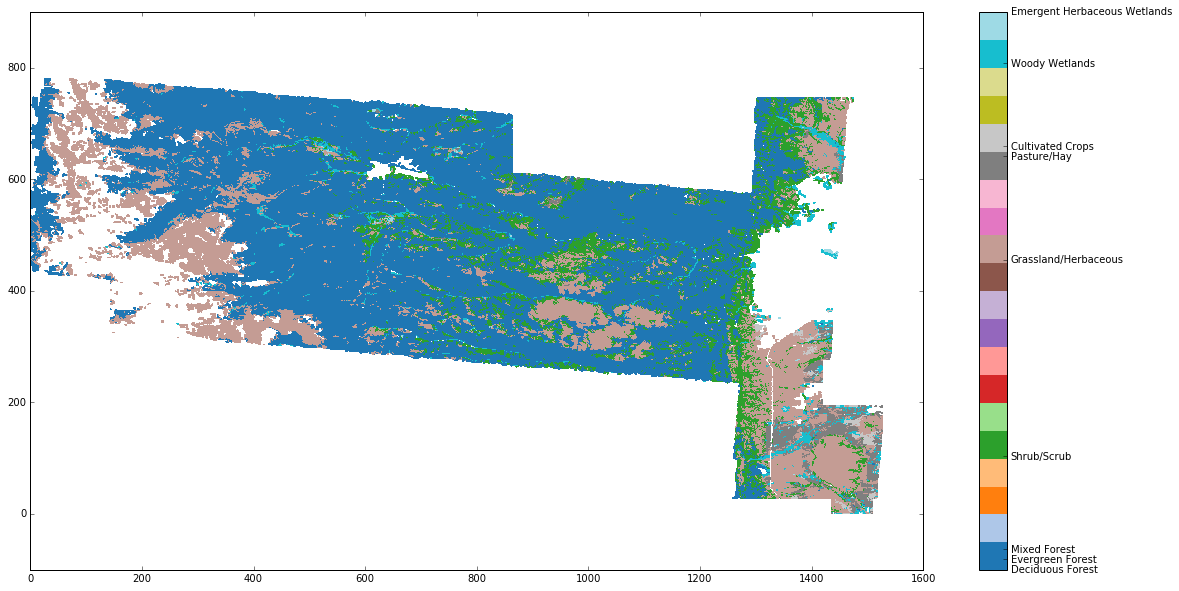

In [16]:
cmap = mpl.colors.ListedColormap(p.tableau.Tableau_20.mpl_colors)

plt.figure(figsize=(20,10))
plt.pcolormesh(dat,cmap = cmap)
plt.axis('equal')
cb = plt.colorbar()
cb.set_ticks(types)
cb.set_ticklabels(names)

In [17]:
out = pd.DataFrame({'Code':types,'Class':names,'percent':num})

In [20]:
m = 60 # number of sites
out['Sites'] = np.floor(out.percent/100.*m)

In [21]:
out

,Class,Code,percent,Sites
0,Deciduous Forest,41,1.660502,0
1,Evergreen Forest,42,62.382106,37
2,Mixed Forest,43,0.084964,0
3,Shrub/Scrub,52,10.801626,6
4,Grassland/Herbaceous,71,20.151072,12
5,Pasture/Hay,81,2.154129,1
6,Cultivated Crops,82,0.388895,0
7,Woody Wetlands,90,2.197086,1
8,Emergent Herbaceous Wetlands,95,0.179622,0


In [26]:
mask = [11,12,21,22,23,24,31,]

646184